In [2]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns
tips = sns.load_dataset("tips")

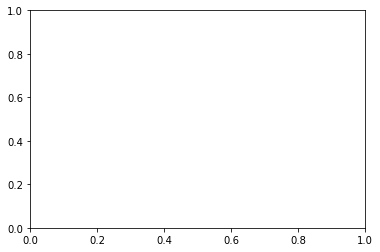

In [5]:
ax = plt.subplots()

/Users/j-max/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Freq')

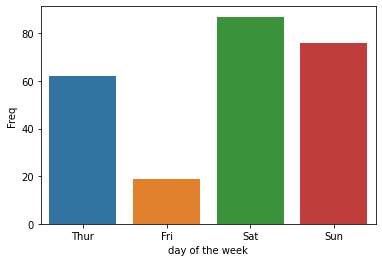

In [6]:
ax = sns.countplot("day", data = tips)
ax.set_xlabel("day of the week")
ax.set_ylabel("Freq")

In [8]:
tips.groupby("day").size()

day
Thur    62
Fri     19
Sat     87
Sun     76
dtype: int64

In [9]:
tips["day"].value_counts() #ascending = True 통해 오름차순으로 조정

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

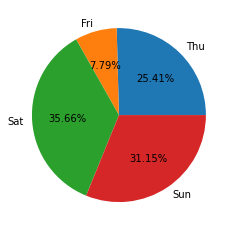

In [15]:
import pandas as pd
day_4 = pd.Series([62, 19, 87, 76], index= ["Thu", "Fri", "Sat", "Sun"])
ax = plt.subplots()
ax = plt.pie(day_4, labels = day_4.index, autopct = "%.2f%%")

Text(0, 0.5, 'tip $')

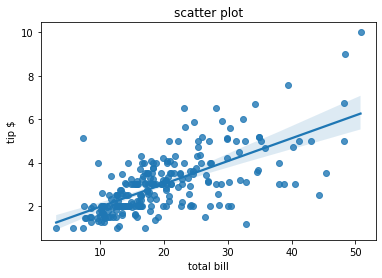

In [16]:
ax= plt.subplots() # 기본 틀
ax= sns.regplot(x= 'total_bill', y= 'tip', data= tips) 
# regplot + 회귀선
ax.set_title('scatter plot') # 제목 
ax.set_xlabel('total bill') # x축 설정
ax.set_ylabel('tip $') 

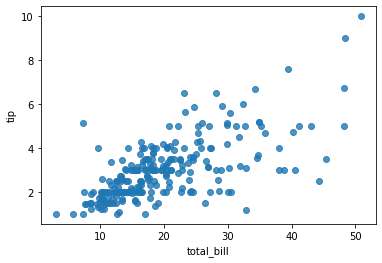

In [17]:
ax= plt.subplots()
ax= sns.regplot(x= 'total_bill', y= 'tip', data= tips, fit_reg= False)
# 위와 동일, fit_reg= False 산점도 그리되, 회귀선은 표시하지 말아라

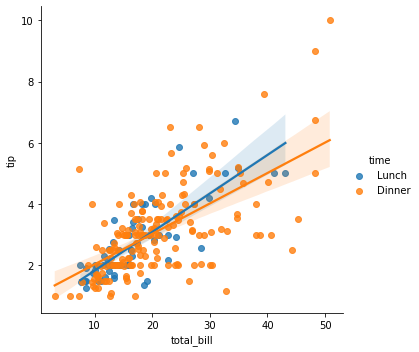

In [18]:
# 산점도 관계 그래프 그리기, 색상추가 hue= ''
# hue= 'time' 식사 시간대에 따라 점의 색깔을 다르게 표시해줌 (regplot 에서는 hue 쓸 수 없다)
scatter= sns.lmplot(x= 'total_bill', y= 'tip', data= tips, hue= 'time')

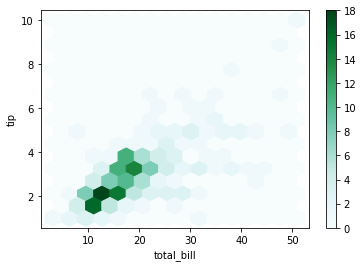

In [19]:
# 육각 그래프 그리기. 진하기로 집중도 표시해줌
# gridsize 통해서 육각형의 크기 조절할 수 있음(숫자 작을수록 육각형 커짐)
fig, ax= plt.subplots()
ax= tips.plot.hexbin(x= 'total_bill', y= 'tip', gridsize= 15, ax= ax)

Text(0.5, 1.0, 'joint plot')

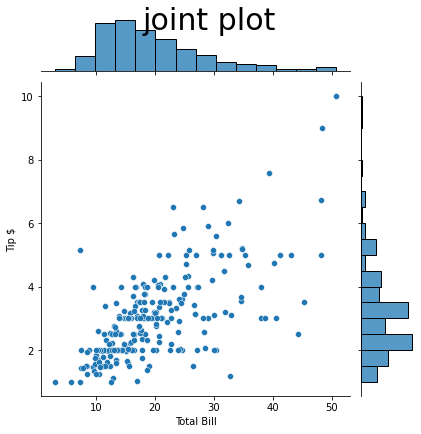

In [21]:
# 산점도와 히스토그램을 한 화면에 그려주기 joint 메서드 사용
joint= sns.jointplot(x= 'total_bill', y= 'tip', data= tips) 
# 그래프 그리기
joint.set_axis_labels(xlabel= 'Total Bill', ylabel= "Tip $") 
# x y 축 설정
joint.fig.suptitle('joint plot', fontsize= 30, y=1.0) 
#제목, 폰트사이즈, y는 제목위치 조정값

Text(0.5, 1.0, 'hexbin joint plot')

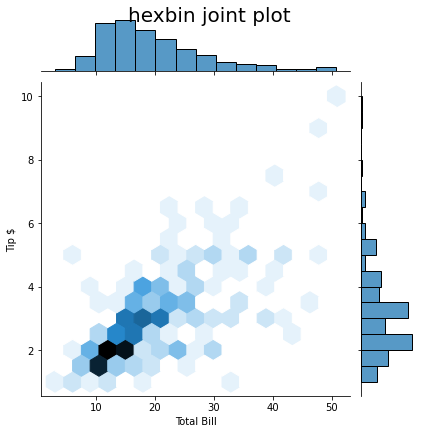

In [22]:
# 육각형 그래프. 산점도의 점이 겹친 부분, 육각형에서는 진하게 나타나서 데이터 분포의 밀집 정도를 잘 보여준다
hexbin= sns.jointplot(x= 'total_bill', y= 'tip', data= tips, kind= "hex") 
# kind= "hex" 추가 -> hexbin으로 변경
hexbin.set_axis_labels(xlabel= 'Total Bill', ylabel= "Tip $") 
hexbin.fig.suptitle('hexbin joint plot', fontsize= 20, y=1.0) 

Text(0.5, 1.0, 'Bill of Lunch and Dinner')

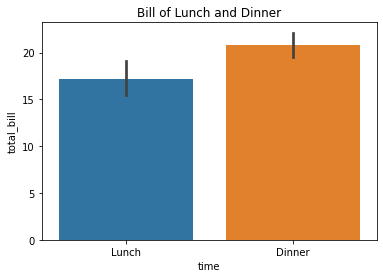

In [25]:
ax = plt.subplots()
ax = sns.barplot(x="time", y="total_bill", data= tips)
ax.set_title("Bill of Lunch and Dinner")

In [26]:
mean= sum(tips['total_bill'])/ len(tips['total_bill'])
mean= round(mean, 2)
print(mean) 
#총 음식값의 평균

19.79


In [28]:
print(tips.groupby('time')['total_bill'].mean()) 
#시간에 따라 group화 한 total bill의 평균

print(tips.groupby('day')['total_bill'].mean())
#날짜에 따라 group화 한 total bill의 평균

time
Lunch     17.168676
Dinner    20.797159
Name: total_bill, dtype: float64
day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64


Text(0.5, 1.0, 'Boxplot of Lunch and dinner')

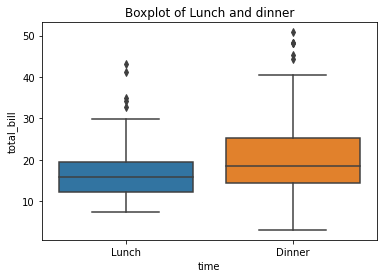

In [29]:
ax = plt.subplots()
ax = sns.boxplot(x= "time", y="total_bill", data = tips)
ax.set_title("Boxplot of Lunch and dinner")

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe1d0159a60>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe1d01641c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe1d01596d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fe1d01648e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe1d0164c70>,
 'means': []}

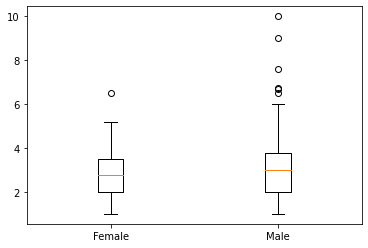

In [34]:
#상당히 불편했던 이전 방식
boxplot = plt.figure()
ax = boxplot.add_subplot(1,1,1)
ax.boxplot([tips[tips['sex']== 'Female']['tip'], tips[tips['sex']== 'Male']['tip']], labels= ['Female', 'Male'])

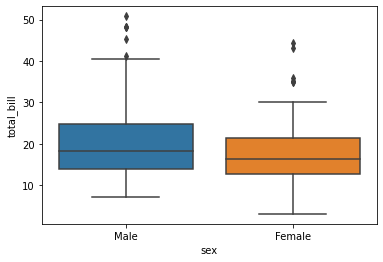

In [35]:
#현재 방식, R의 ggplot과 상당히 유사한 방식을 사용한다
ax = plt.subplots()
ax = sns.boxplot(x= "sex", y= "total_bill", data = tips)

In [36]:
#iris 데이터 sample로 가지고 놀기
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [37]:
print(iris.shape)

(150, 5)


In [38]:
iris.groupby("species").size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

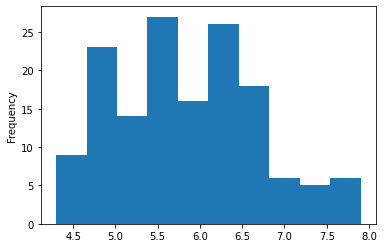

In [39]:
ax= plt.subplots()
ax= iris["sepal_length"].plot.hist()

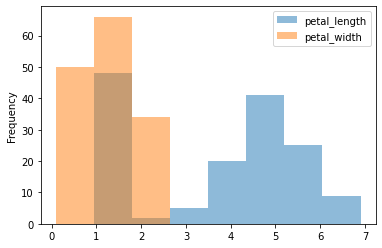

In [44]:
# 중첩 히스토그램 - 그리는 그래프 수 만큼의 fig가 필요하다는걸 잊지 말자
# alpha는 투명도 조절, bins는 막대 수
fig, ax= plt.subplots() 
# 한번에 여러개 그래프 그리기 : fig, ax라는 두 변수에다가 subplot배당
ax= iris[['petal_length', 'petal_width']].plot.hist(alpha= 0.5, bins= 8, ax= ax)

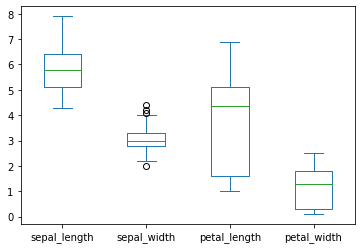

In [45]:
#box method : 연속형 데이터는 모두 박스 플랏으로 표현 가능함
#이렇게 하면 한꺼번에 모든 항목에 대한 boxplot표현가능
fig, ax = plt.subplots()
ax = iris.plot.box(ax=ax)

Text(0.5, 1.0, 'Sepal length by species')

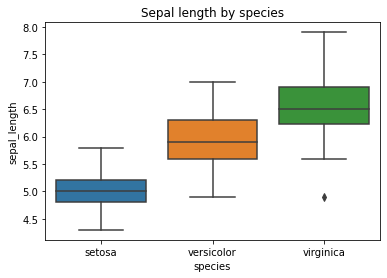

In [47]:
ax = plt.subplots()
ax = sns.boxplot(x="species", y="sepal_length", data= iris)
ax.set_title("Sepal length by species")

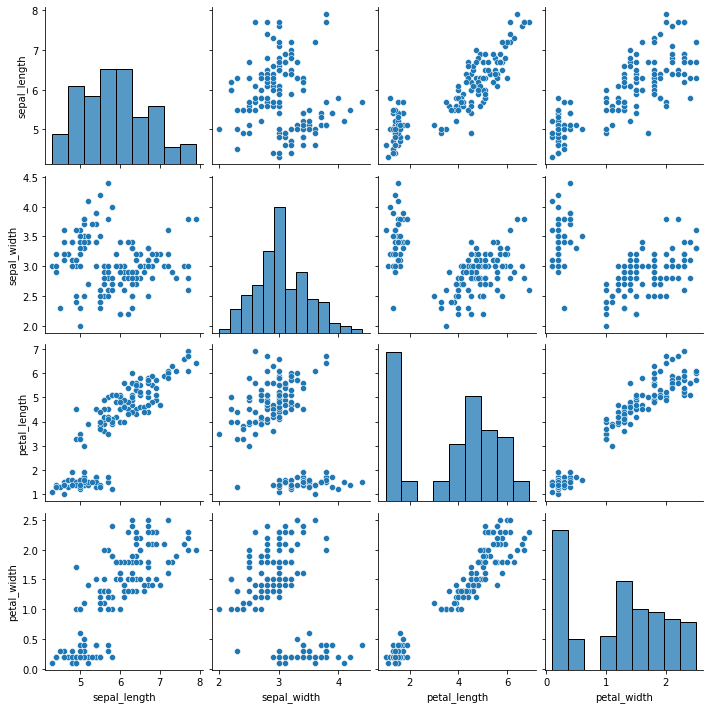

In [48]:
#pairplot mathod : 데이터 안의 모든 변수 종류간의 관계를 나타낸 그랲
#단 문자데이터는 제외
fig = sns.pairplot(iris)

In [49]:
print(iris.dtypes) #species는 포함되지 않은 모습

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
